In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
wine_df = pd.read_csv("wine-quality-white-and-red.csv")
wine_df.head()
wine_df.info()
wine_df.describe()
wine_df['type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,count
type,
white,4898
red,1599


<Axes: >

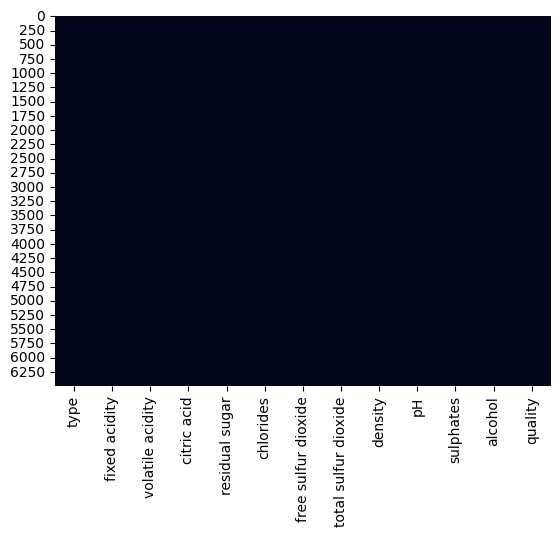

In [ ]:
sns.heatmap(wine_df.isnull(), cbar=False)

Text(0.5, 1.0, 'Distribution of Red vs White Wines')

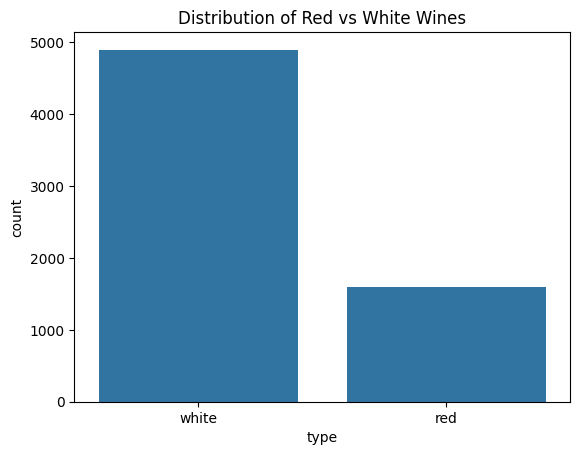

In [ ]:
sns.countplot(x='type', data=wine_df)
plt.title('Distribution of Red vs White Wines')

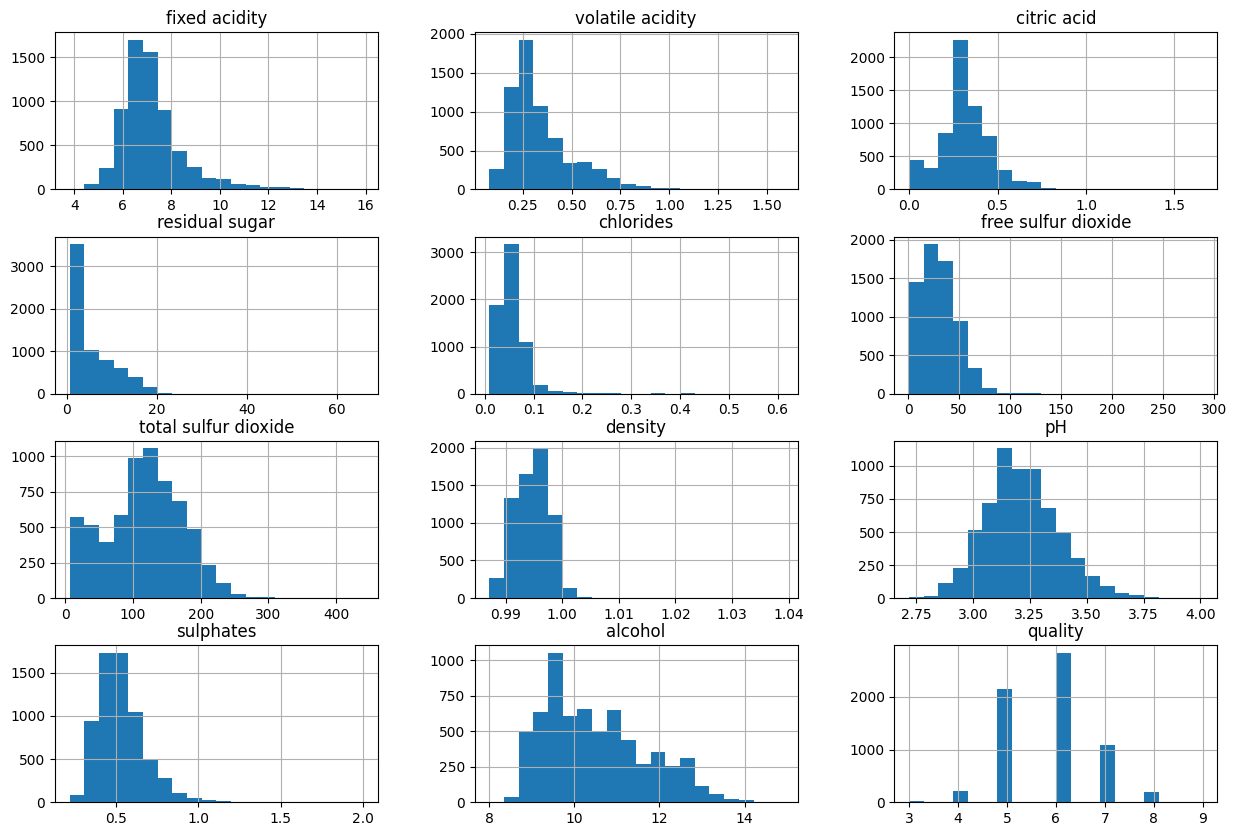

In [ ]:
wine_df.hist(bins=20, figsize=(15, 10))
plt.show()

<Axes: xlabel='type', ylabel='alcohol'>

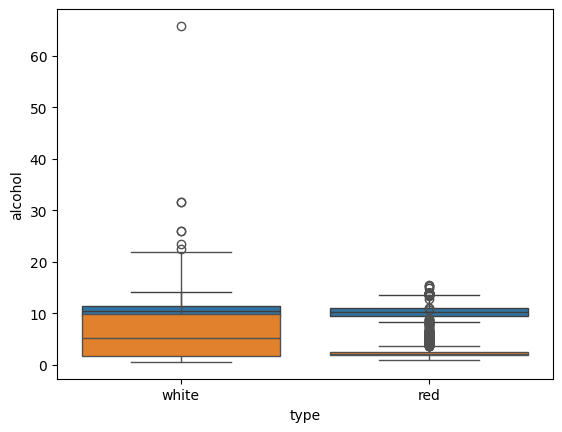

In [ ]:
sns.boxplot(x='type', y='alcohol', data=wine_df)
sns.boxplot(x='type', y='residual sugar', data=wine_df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_df['type_encoded'] = le.fit_transform(wine_df['type'])  # red=0, white=1


In [ ]:
X = wine_df.drop(['type', 'type_encoded'], axis=1)
y = wine_df['type_encoded']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(C=0.8 , penalty='l2',solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42),
    'SVM': SVC(C=0.5,kernel='rbf')
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression
Accuracy: 0.9961538461538462

Random Forest
Accuracy: 0.9961538461538462

SVM
Accuracy: 0.9961538461538462


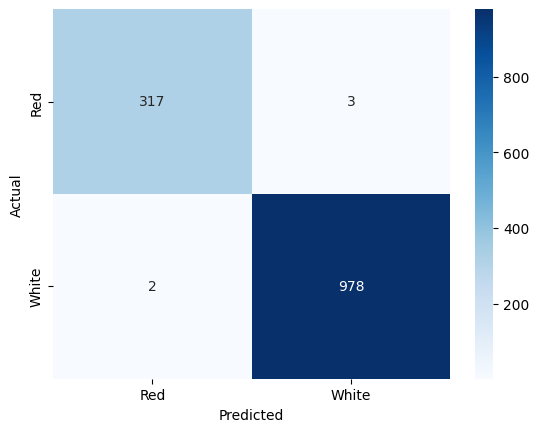

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red','White'], yticklabels=['Red','White'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



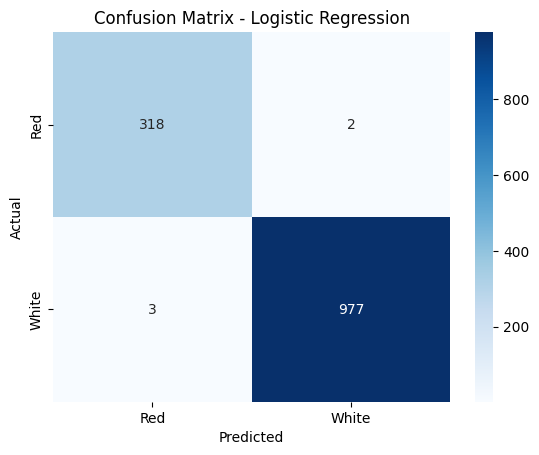


Random Forest
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



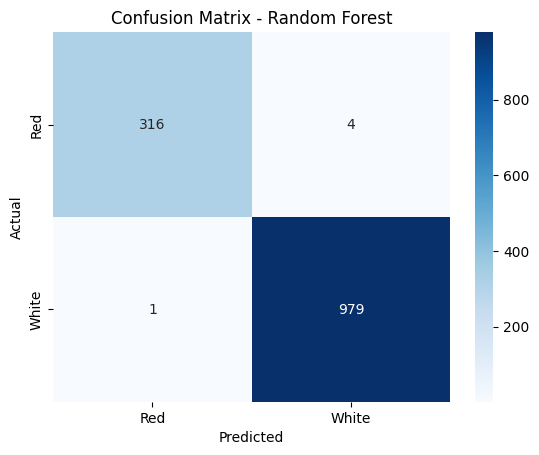


SVM
Accuracy: 0.9961538461538462
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



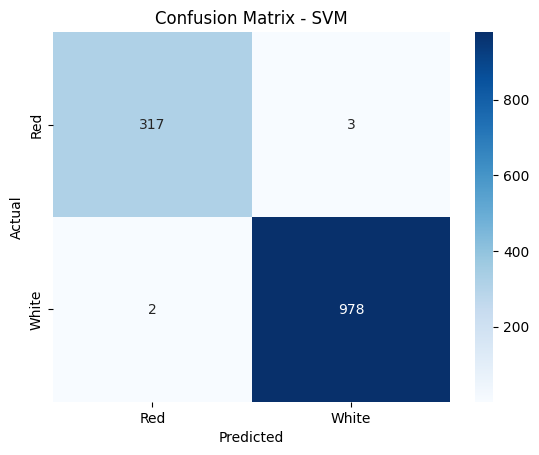

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Red','White'], yticklabels=['Red','White'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Overfitting:
This happens when a model learns too much from the training data, including noise and random details.
→ It performs very well on training data but poorly on new (test) data because it doesn’t generalize well.
Example: Memorizing answers instead of understanding concepts.

Underfitting:
This happens when a model is too simple and can’t capture the underlying pattern in the data.
→ It performs poorly on both training and test data.
Example: Not studying enough to even learn the basic patterns.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42)




In [ ]:
from sklearn.svm import SVC
model = SVC( C=0.5,kernel='rbf')

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.8 , penalty='l2',solver='liblinear')

In [ ]:
wine_df['type'].value_counts(normalize=True)

,proportion
type,
white,0.753886
red,0.246114


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal , y_train_bal = smote.fit_resample(X_train,y_train)

Accuracy after SMOTE: 0.9961538461538462

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       320
           1       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



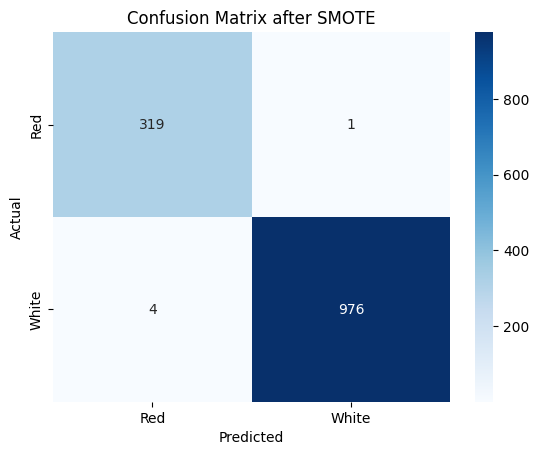

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_bal, y_train_bal)

# ⿢ Predict on test data
y_pred_bal = model.predict(X_test)

# ⿣ Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_bal)
print("Accuracy after SMOTE:", accuracy)

# ⿤ Show classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))

# ⿥ Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_bal)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Red','White'], yticklabels=['Red','White'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix after SMOTE')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X,y,cv=5, scoring='accuracy')
print("Cross-validation scores:",cv_scores)
print("AVerage accuracy:",cv_scores.mean())

Cross-validation scores: [0.97615385 0.98692308 0.99384142 0.98229407 0.98383372]
AVerage accuracy: 0.9846092260318589
